In [11]:
import pandas as pd
import numpy  as np
import pickle
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 

RESEARCH_WORK_PATH = "/content/drive/MyDrive/Colab Notebooks/BachelorResearch/"

In [13]:
feelings = 'Q1 Q2 Q3 Q4'.split()
csv_path = RESEARCH_WORK_PATH + "note/data2s.csv"

data = pd.read_csv(csv_path, usecols=range(0, 28))
data = data[data['label'].isin(feelings)].reset_index(drop=True)
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(genre_list)
y = to_categorical(y, num_classes=4)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
print(X_train.shape)
print(y_train)

(8960, 26)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6912      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 48,324
Trainable params: 48,324
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
hist = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_test,y_test),
                    batch_size=32).history

Epoch 1/50
280/280 [==============================] - 7s 6ms/step - loss: 0.9486 - accuracy: 0.5804 - val_loss: 0.8501 - val_accuracy: 0.6214
Epoch 2/50
280/280 [==============================] - 2s 5ms/step - loss: 0.8221 - accuracy: 0.6381 - val_loss: 0.8018 - val_accuracy: 0.6589
Epoch 3/50
280/280 [==============================] - 1s 5ms/step - loss: 0.7498 - accuracy: 0.6866 - val_loss: 0.7459 - val_accuracy: 0.6871
Epoch 4/50
280/280 [==============================] - 1s 5ms/step - loss: 0.6691 - accuracy: 0.7240 - val_loss: 0.7317 - val_accuracy: 0.6996
Epoch 5/50
280/280 [==============================] - 1s 5ms/step - loss: 0.5976 - accuracy: 0.7577 - val_loss: 0.7204 - val_accuracy: 0.7089
Epoch 6/50
280/280 [==============================] - 1s 5ms/step - loss: 0.5283 - accuracy: 0.7951 - val_loss: 0.6405 - val_accuracy: 0.7339
Epoch 7/50
280/280 [==============================] - 1s 5ms/step - loss: 0.4697 - accuracy: 0.8182 - val_loss: 0.6367 - val_accuracy: 0.7379
Epoch 

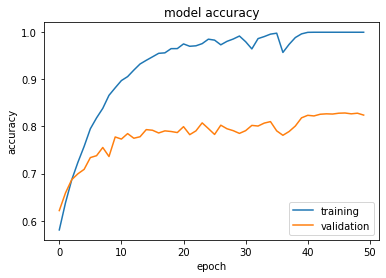

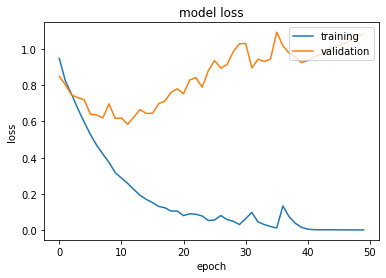

In [7]:
from matplotlib import pyplot as plt

def plot_history(history):
    # 分類精度の履歴をプロット
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

    # 損失関数の履歴をプロット
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

plot_history(hist)

In [14]:
model.save(RESEARCH_WORK_PATH + "models/1d")
pickle.dump(scaler, open(RESEARCH_WORK_PATH + "/models/1d_scaler.pickle", "wb"))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/BachelorResearch/models/1d/assets
